## Домашнее задание 27
### Козел А.Г. 22.02.2023 - 15.03
https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/ 
* ДЗ - оценить возраст человека по изображению. В качестве датасета возьмите датасет только лиц. 
Предположим что сами лица вы находить и извлекать уже умеете. Можете сделать это как продолжение решения по поиску лиц из предыдущих работ.
https://www.google.com/amp/s/www.geeksforgeeks.org/age-detection-using-deep-learning-in-opencv/amp/ пример того как это может работать.  
В качестве фьючеэкстрактора берите любую современную нейронную сеть. Задачу можно решать как задачу регрессии или классификации.  14 14-18 
Если есть время можете попробовать 2 способа.  Попробуйте разблокировать часть слоев после обучения и дообучить модель.



 
0-14 14-18 18-21 21-


Указание -  что бы решить задачу регресси вам нужно использовать flow_from_dataframe
Указание - для начала вам нужно создать датафрейм в котором будет относительный путь к изображению и целевая метка, потом использовать этот датафрейм при обучении

	

In [1]:
import sys
import sklearn
import tensorflow as tf
import numpy as np
import os
import random
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
from imutils import face_utils
import imutils
import dlib
import pandas as pd
from sklearn import metrics
from tensorflow import keras
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from tensorflow.python.keras.models import Sequential

from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, CategoryEncoding, Dropout


In [2]:
tf.__version__
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
data = 'c:\\Users\\37533\\Desktop\\jupyter\\ДЗ_28\\data_'

In [4]:
import face_recognition
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
from tqdm import tqdm

# Загрузка данных 
Так как прошлый раз фильтрацияданных заняла много времени, уже больше не повторяла. В первом случае за счет проверки нечитаемых данных времени очень много тратилось, во втором быстрее. 

In [ ]:
face = 0 # счетчик изображений с лицами
no_face = 0 #счетчик изображений без лиц
no_read = 0 # счетчик нечитаемых изображений

df = pd.DataFrame(columns=['link', 'age'])
for folder in tqdm(os.listdir('./data_')):
    for file in os.listdir(os.path.join(data, folder)):
        try:
            link = os.path.join(data, folder, file)
            img = Image.open(link)  # загрузить изображение
            image = face_recognition.load_image_file(os.path.join(data, folder, file))
            if len(face_recognition.face_landmarks(image)) == 1:
                face +=1
                #определяем возраст
                name = file[:-4] #убираем расширение файла из имени
                age_end = name.split('_')[2] # делаем сплит по нижнему подчеркиванию и выбираем последнюю дату
                age_start=str(name.split('_')[1]).split('-')[0] # делаем сплит, выбираем первую дату и далаем сплит по дефису, 
                                                            # выбираем год.
                age_fin = int(age_end)-int(age_start) #Вычисляем возраст
            
                if age_fin>100 or age_fin<0: # Если возраст больше 100 или меньше 0, то выкидываем из набора
                    continue
             
            else:
                no_face +=1
            #формируем временный датафрейм
            dat = pd.DataFrame({"link": [link],
                                "age": [age_fin]})
               #Делаем конкатенацию с основным датафреймом.
            df = pd.concat([df,dat])
            
        except:
            no_read+=1
            None 
        
print(f'Изображения с лицами {face}')
print(f'Изображения без лиц {no_face}')
print(f'Нечитаемые изображения {no_read}')

df.to_csv('data_cleaned.csv') #Сохраним в файл полученный Dataframe на случай перезагрузки, чтобы не чистить второй раз )))

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
face1 = 0 # счетчик изображений с лицами
no_face1 = 0 #счетчик изображений без лиц


df1 = pd.DataFrame(columns=['link', 'age'])
for folder in tqdm(os.listdir('./data_')):   
    for file in os.listdir(os.path.join(data, folder)):
        link = os.path.join(data, folder, file) 
        img = Image.open(link)  # загрузить изображение
        image = face_recognition.load_image_file(os.path.join(data, folder, file))
        if len(face_recognition.face_landmarks(image)) == 1:
            face1 +=1 #если 1 лицо найдено, добавляем +1
                #определяем возраст
            name = file[:-4] #убираем расширение файла из имени
            age_end = name.split('_')[2] # делаем сплит по нижнему подчеркиванию и выбираем последнюю дату
            age_start=str(name.split('_')[1]).split('-')[0] # делаем сплит, выбираем первую дату и далаем сплит по дефису, 
                                                            # выбираем год.
            age_fin = int(age_end)-int(age_start) #Вычисляем возраст
            
            if age_fin>100 or age_fin<0:# Если возраст больше 100 или меньше 0, то выкидываем из набора
                continue
            dat = pd.DataFrame({"link": [link],
                             "age": [age_fin]})
               #Делаем конкатенацию с основным датафреймом.
            df1 = pd.concat([df1,dat])
             
        else:
            no_face1 +=1
            #формируем временный датафрейм
        
        
print(f'Изображения с лицами {face1}')
print(f'Изображения без лиц {no_face1}')


df1.to_csv('data_face.csv') #Сохраним в файл полученный Dataframe 

Использую уже дальше сохраненный при первом запуске Dataframe

## Анализ данных

In [5]:
df1 = pd.read_csv ('data_face.csv')

<AxesSubplot: >

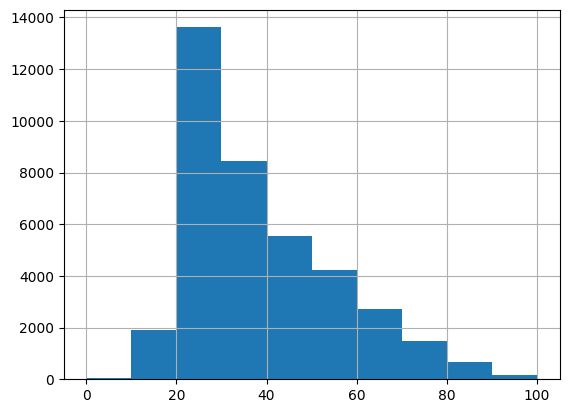

In [6]:
df1['age'].hist()

In [7]:
df1.head(5)

,Unnamed: 0,link,age
0,0,c:\Users\37533\Desktop\jupyter\ДЗ_28\data_\00\...,67
1,0,c:\Users\37533\Desktop\jupyter\ДЗ_28\data_\00\...,27
2,0,c:\Users\37533\Desktop\jupyter\ДЗ_28\data_\00\...,46
3,0,c:\Users\37533\Desktop\jupyter\ДЗ_28\data_\00\...,43
4,0,c:\Users\37533\Desktop\jupyter\ДЗ_28\data_\00\...,48


In [8]:
df1.nunique()

Unnamed: 0        1
link          38820
age             101
dtype: int64

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38820 entries, 0 to 38819
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  38820 non-null  int64 
 1   link        38820 non-null  object
 2   age         38820 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 910.0+ KB


In [10]:
df1['age'].value_counts()

26    1612
24    1561
27    1519
23    1488
25    1478
      ... 
3        3
98       3
5        1
2        1
4        1
Name: age, Length: 101, dtype: int64

In [11]:
print(df1.shape)
df1['age'].describe(include = "all").T

(38820, 3)


count    38820.000000
mean        38.340752
std         16.608884
min          0.000000
25%         25.000000
50%         33.000000
75%         49.000000
max        100.000000
Name: age, dtype: float64

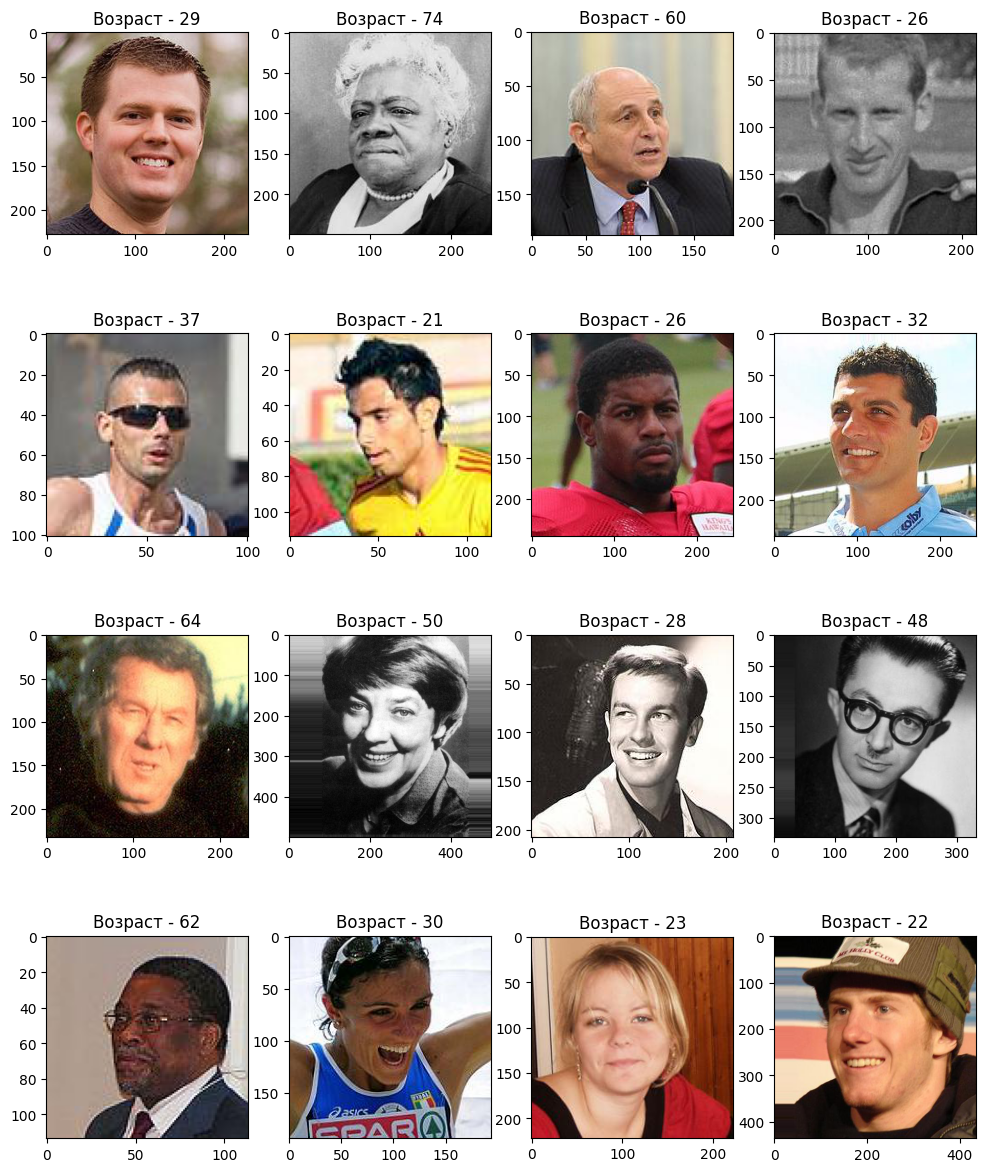

In [71]:
idx = np.random.randint (0,len(data),16)
plt.figure(figsize=(12,15))
for idx in enumerate(idx):
    plt.subplot (4,4,idx[0]+1)
    link = df1.iloc[idx[1]]
    image = plt.imread(link[1])
    plt.title ('Возраст - ' + str(link[2]))
    plt.imshow(image, cmap='gray');
    

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Activation, Flatten, CategoryEncoding,\
                                    Dropout, BatchNormalization, AveragePooling2D, GlobalMaxPool2D

from tensorflow.keras.models import Sequential, load_model

from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.metrics import RootMeanSquaredError


## Модель 1

In [58]:
train, test = train_test_split(df1, test_size=0.2, random_state=34)


In [59]:
train_datagen=ImageDataGenerator(rescale=1./255.,validation_split=0.3)
test_datagen=ImageDataGenerator(rescale=1./255.)


In [60]:
TARGET_SIZE = (224,224)

train_generator=train_datagen.flow_from_dataframe(
dataframe=train,
directory="./",
x_col="link",
y_col="age",
subset="training",
batch_size=32,
seed=42,
shuffle=True,
class_mode="raw",
color_mode='rgb',
target_size=TARGET_SIZE)

valid_generator=train_datagen.flow_from_dataframe(
dataframe=train,
directory="./",
x_col="link",
y_col="age",
subset="validation",
batch_size=32,
seed=42,
shuffle=True,
class_mode="raw",
color_mode='rgb',
target_size=TARGET_SIZE)

test_generator=test_datagen.flow_from_dataframe(
dataframe=test,
directory="./",
x_col="link",
y_col="age",
batch_size=32,
seed=42,
shuffle=False,
class_mode="raw",
color_mode='rgb',
target_size=TARGET_SIZE)

Found 21740 validated image filenames.
Found 9316 validated image filenames.
Found 7764 validated image filenames.


In [61]:

model = Sequential()


model.add(Conv2D(32, (3, 3), input_shape = (224, 224, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
          
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1024))
model.add(Dense(1, activation='linear'))


In [62]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 activation_25 (Activation)  (None, 224, 224, 32)      0         
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 112, 112, 64)      18496     
                                                                 
 activation_26 (Activation)  (None, 112, 112, 64)      0         
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 56, 56, 64)       0         
 g2D)                                                 

In [63]:
model.compile(optimizer = Adam(),loss="mse", metrics=["mae"])

In [64]:
lr_scheduler = ReduceLROnPlateau(factor=0.2, patience=2)

checkpoint_cb = ModelCheckpoint("ConvModel.h5", 
                                     monitor = "val_loss",
                                     save_best_only=True)

In [65]:
history = model.fit(train_generator,
                    validation_data=valid_generator,
                    callbacks=[checkpoint_cb, lr_scheduler],
                    epochs=30)

Epoch 1/30
680/680 [==============================] - 221s 323ms/step - loss: 321.1034 - mae: 14.2849 - val_loss: 271.6710 - val_mae: 13.4775 - lr: 0.0010
Epoch 2/30
680/680 [==============================] - 216s 318ms/step - loss: 287.0339 - mae: 13.7788 - val_loss: 285.4429 - val_mae: 12.9715 - lr: 0.0010
Epoch 3/30
680/680 [==============================] - 217s 319ms/step - loss: 286.2762 - mae: 13.7522 - val_loss: 292.6743 - val_mae: 12.9360 - lr: 0.0010
Epoch 4/30
680/680 [==============================] - 221s 324ms/step - loss: 281.2764 - mae: 13.6723 - val_loss: 273.4380 - val_mae: 13.2191 - lr: 2.0000e-04
Epoch 5/30
680/680 [==============================] - 220s 323ms/step - loss: 281.1725 - mae: 13.6677 - val_loss: 271.5182 - val_mae: 13.4992 - lr: 2.0000e-04
Epoch 6/30
680/680 [==============================] - 221s 325ms/step - loss: 280.9665 - mae: 13.6752 - val_loss: 272.3078 - val_mae: 13.6640 - lr: 2.0000e-04
Epoch 7/30
680/680 [==============================] - 221s

In [66]:
model.evaluate (test_generator)

243/243 [==============================] - 30s 121ms/step - loss: 278.3709 - mae: 13.6918


[278.37091064453125, 13.691787719726562]

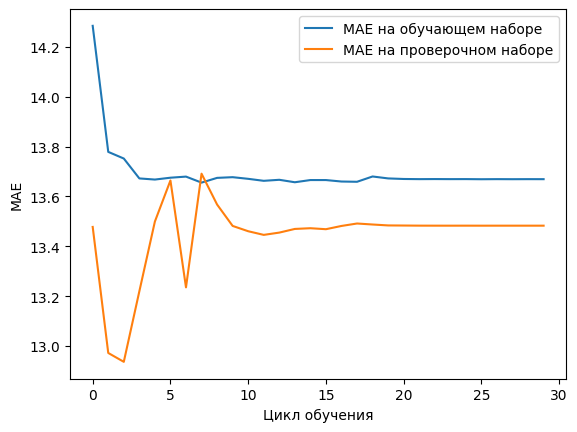

In [78]:
plt.plot(history.history['mae'], label='MAE на обучающем наборе')
plt.plot(history.history['val_mae'], label='MAE на проверочном наборе')
plt.xlabel('Цикл обучения')
plt.ylabel('MAE')
plt.legend()
plt.show()

### Вывод
Скорее всего необходимо было убирать изображения плохого качества, возможно точность была бы гораздо выше.

## Модель 2


In [38]:
train, test = train_test_split(df1, test_size=0.3, random_state=34)

In [39]:
train_datagen=ImageDataGenerator(rescale=1./255.,validation_split=0.3)
test_datagen=ImageDataGenerator(rescale=1./255.)


In [40]:
ARGET_SIZE = (224,224)

train_generator=train_datagen.flow_from_dataframe(
dataframe=train,
directory="./",
x_col="link",
y_col="age",
subset="training",
batch_size=32,
seed=42,
shuffle=True,
class_mode="raw",
color_mode='rgb',
target_size=TARGET_SIZE)

valid_generator=train_datagen.flow_from_dataframe(
dataframe=train,
directory="./",
x_col="link",
y_col="age",
subset="validation",
batch_size=32,
seed=42,
shuffle=True,
class_mode="raw",
color_mode='rgb',
target_size=TARGET_SIZE)

test_generator=test_datagen.flow_from_dataframe(
dataframe=test,
directory="./",
x_col="link",
y_col="age",
batch_size=32,
seed=42,
shuffle=False,
class_mode="raw",
color_mode='rgb',
target_size=TARGET_SIZE)

Found 19022 validated image filenames.
Found 8152 validated image filenames.
Found 11646 validated image filenames.


In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, CategoryEncoding,\
                                    Dropout, BatchNormalization, AveragePooling2D, Activation
from tensorflow.keras.optimizers import Adam

model = Sequential()


model.add(Conv2D(32, (3, 3), input_shape = (224, 224, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
          
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1024))
model.add(Dense(1, activation='linear'))

In [ ]:
model.summary()

In [33]:
model.compile(optimizer = Adam(),loss="mse", metrics=["mae"])

In [35]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

lr_scheduler = ReduceLROnPlateau(factor=0.2, patience=3)
# monitor	количество, подлежащее контролю.
# factor	фактор, на который будет снижаться скорость обучения. . new_lr = lr * factor
# patience	количество эпох без улучшения, после которых скорость обучения будет снижена.

checkpoint_cb = ModelCheckpoint("ConvModel.h5", 
                                     monitor = "val_mae",
                                     save_best_only=True)


ModelCheckpoint
##### monitor	
Имя метрики для мониторинга. Обычно метрики задаются методом Model.compile. Примечание:
* Добавьте к имени префикс "val_", чтобы отслеживать показатели проверки.
* Используйте "loss"или " val_loss" для контроля общих потерь модели.
* Если вы указываете метрики в виде строк, например "accuracy", передайте ту же строку (с "val_"префиксом или без него).
##### save_best_only	
* если , он сохраняется только тогда, когда модель считается «лучшей», и последняя лучшая модель в соответствии с отслеживаемым количеством не будет перезаписана. Если не содержит такие параметры форматирования, как then, они будут перезаписываться каждой новой лучшей моделью. save_best_only=Truefilepath{epoch}filepath


In [36]:
with tf.device('/gpu:0'):
    history = model.fit(train_generator,
                    validation_data=valid_generator,
                    callbacks=[checkpoint_cb, lr_scheduler],
                    epochs=50)

Epoch 1/50
595/595 [==============================] - 236s 392ms/step - loss: 278.7593 - mae: 13.6268 - val_loss: 285.4851 - val_mae: 13.4114 - lr: 0.0010
Epoch 2/50
595/595 [==============================] - 221s 371ms/step - loss: 277.5975 - mae: 13.6140 - val_loss: 284.2864 - val_mae: 14.0927 - lr: 0.0010
Epoch 3/50
595/595 [==============================] - 215s 361ms/step - loss: 277.1070 - mae: 13.6019 - val_loss: 282.7889 - val_mae: 13.5579 - lr: 0.0010
Epoch 4/50
595/595 [==============================] - 226s 378ms/step - loss: 276.3051 - mae: 13.6041 - val_loss: 282.1817 - val_mae: 13.8566 - lr: 0.0010
Epoch 5/50
595/595 [==============================] - 217s 365ms/step - loss: 276.3306 - mae: 13.6181 - val_loss: 282.7527 - val_mae: 13.5611 - lr: 0.0010
Epoch 6/50
595/595 [==============================] - 217s 365ms/step - loss: 276.4850 - mae: 13.6163 - val_loss: 282.3511 - val_mae: 13.8883 - lr: 0.0010
Epoch 7/50
595/595 [==============================] - 217s 364ms/step 

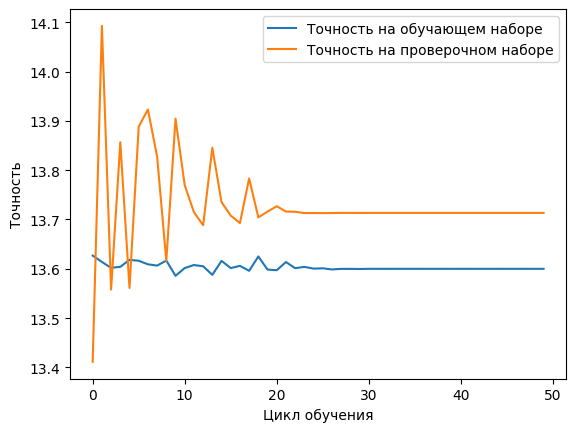

In [37]:
plt.plot(history.history['mae'], label='Точность на обучающем наборе')
plt.plot(history.history['val_mae'], label='Точность на проверочном наборе')
plt.xlabel('Цикл обучения')
plt.ylabel('Точность')
plt.legend()
plt.show()

### Вывод
надо было лучше чистить данные,  убирая изображения плохого качества, возможно точность была бы гораздо выше.
Количество эпох и размер testa ни на что не влиял особо. Один раз смогла получить модель с val_maе около 9, но при перезапуске кода что-то пошло не так. Пару дней возни не дали резуkьтатов и я сдалась. Оставила как есть.